In [1]:
import torch
from torchvision.models import resnet50, ResNet50_Weights
from PIL import Image
import numpy as np
from torchvision import transforms
import matplotlib.pyplot as plt

C:\Users\Olek\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Olek\anaconda3\lib\site-packages\numpy\.libs\libopenblas.4SP5SUA7CBGXUEOC35YP2ASOICYYEQZZ.gfortran-win_amd64.dll
C:\Users\Olek\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\Olek\anaconda3\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: [WinError 127] The specified procedure could not be found
  warn(f"Failed to load image Python extension: {e}")


In [ ]:
classes = ['cauliflower',
 'lemon',
 'biscuit',
 'french_fries',
 'lettuce',
 'bread',
 'cheese',
 'rice',
 'potato',
 'celery_stick',
 'green_beans',
 'blueberry',
 'spring_onion',
 'carrot',
 'grape',
 'corn',
 'fish',
 'juice',
 'cilantro_mint',
 'sausage',
 'other_ingredients',
 'strawberry',
 'cucumber',
 'fried_meat',
 'egg',
 'asparagus',
 'tomato',
 'pork',
 'coffee',
 'french_beans',
 'pepper',
 'pasta',
 'poultry',
 'steak',
 'onion',
 'broccoli',
 'pie',
 'noodles',
 'ice_cream',
 'apple',
 'cake',
 'orange',
 'tomato_sauce']

classes_code = {}
        
for i in range(len(classes)):
    classes_code[classes[i]] = i

tf = transforms.Compose([transforms.ToTensor(), transforms.CenterCrop(224)])

model  = resnet50(weights=ResNet50_Weights)

model.fc = torch.nn.Linear(model.fc.in_features, 43)

model.fc.load_state_dict(torch.load("/Users/ioanna/Projects/FoodSeg/linear_v2.pth"))

C:\Users\Olek\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to C:\Users\Olek/.cache\torch\hub\checkpoints\resnet50-0676ba61.pth
 67%|███████████████████████████████████████████████████▌                         | 65.5M/97.8M [00:06<00:03, 10.6MB/s]

In [ ]:
# Make the imshow output square
plt.figure(figsize=(8,8))
plt.imshow(model.fc.weight.detach().numpy(), aspect = 100)
plt.colorbar()

plt.show()


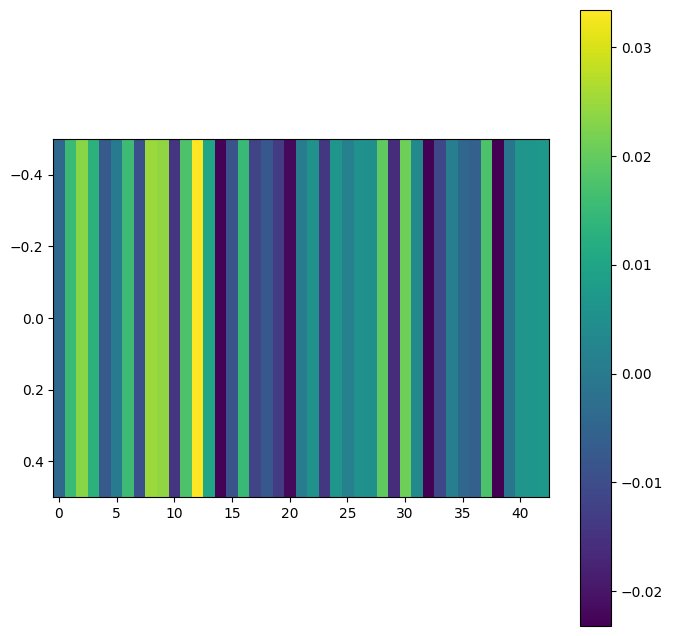

In [6]:
# Make the imshow output square
plt.figure(figsize=(8,8))
plt.imshow([model.fc.bias.detach().numpy()], aspect = 31)
plt.colorbar()

plt.show()


In [7]:
import os 
from torch.utils.data import Dataset

class SegmentedFood(Dataset):
    def __init__(self, data_dir: str, min_samples = 10, transform=None):
        self.data_dir = data_dir
        self.transform = transform

        self.data = []
        self.labels = []
        self.classes = []

        class_names = classes

        i = 0

        for class_name in class_names:

            class_dir = os.path.join(self.data_dir, class_name)

            files_per_class = []
            labels_per_class = []

            for file_name in os.listdir(class_dir):
                if file_name.endswith(".png"):
                    file_path = os.path.join(class_dir, file_name)
                    files_per_class.append(file_path)
                    labels_per_class.append(i)

            if len(files_per_class) > min_samples:
                self.data.extend(files_per_class)
                self.labels.extend(labels_per_class)
                self.classes.append(class_name)

                i += 1

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx: int):
        img = Image.open(self.data[idx])
        label = self.labels[idx]

        if self.transform:
            img = self.transform(img)

        return img, label

In [8]:
data_dir = "/Users/ioanna/Downloads/train_final"
dataset = SegmentedFood(data_dir, 0)
test_set = SegmentedFood("/Users/ioanna/Downloads/test_final", 0)

In [ ]:
# plot in a row the first 10 images
fig, axes = plt.subplots(1, 10, figsize=(20, 20))

for i in range(10):
    img, label = dataset[i]
    axes[i].imshow(img)
    axes[i].set_title(dataset.classes[label])
    # remove ticks
    axes[i].set_xticks([])
    axes[i].set_yticks([])


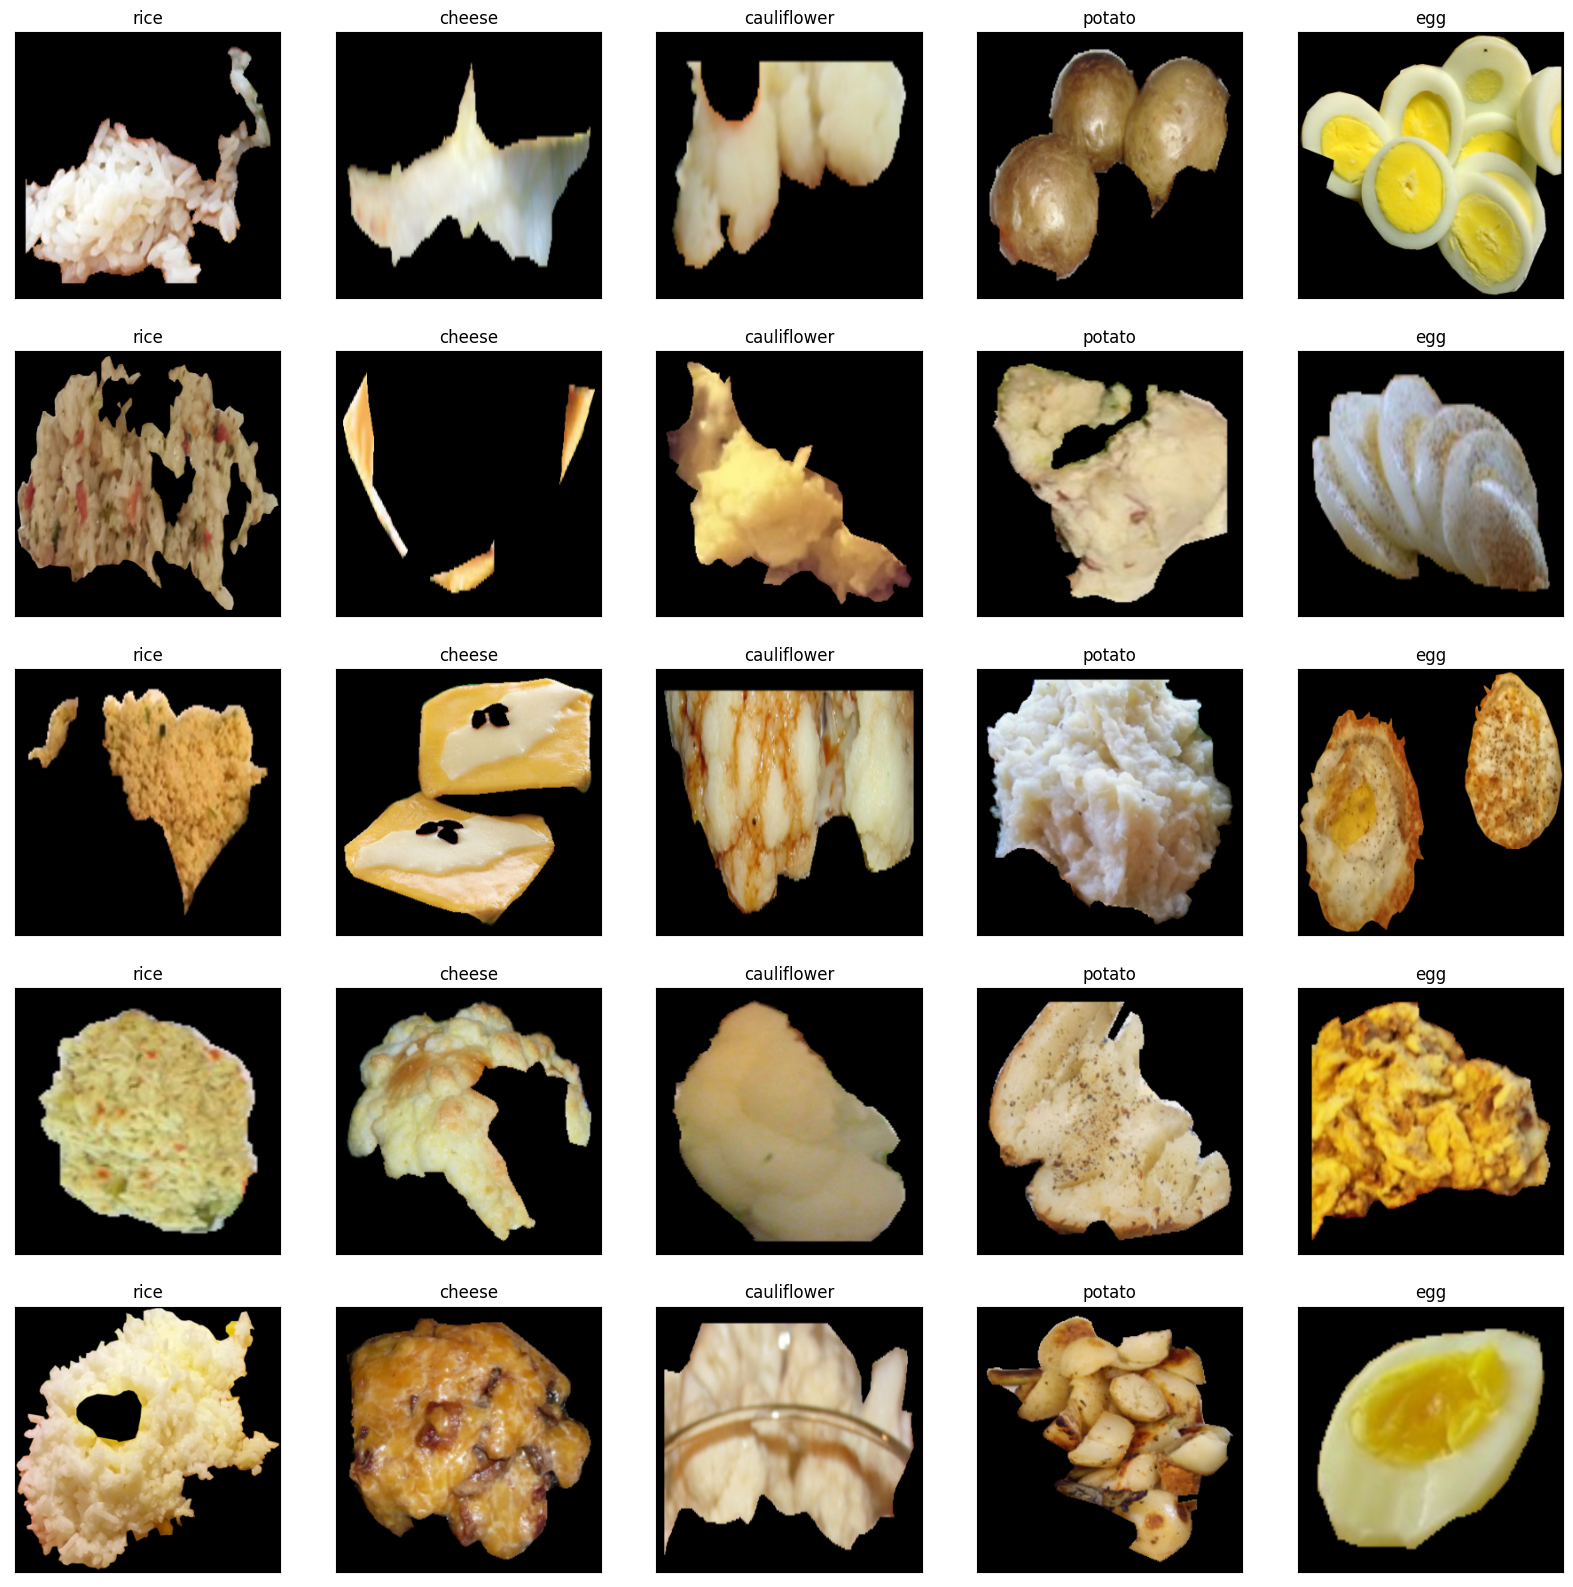

In [40]:
# get rice images
rice_images = [img for img, label in dataset if label == classes_code["rice"]]
# get cheese images
cheese_images = [img for img, label in dataset if label == classes_code["cheese"]]
# get cauliflower images
cauliflower_images = [img for img, label in dataset if label == classes_code["cauliflower"]]
# get potato images
potato_images = [img for img, label in dataset if label == classes_code["potato"]]
# egg images
egg_images = [img for img, label in dataset if label == classes_code["egg"]]

# shuffle the images
np.random.shuffle(rice_images)
np.random.shuffle(cheese_images)
np.random.shuffle(cauliflower_images)
np.random.shuffle(potato_images)
np.random.shuffle(egg_images)

# plot 4 images from each class
fig, axes = plt.subplots(5, 5, figsize=(20, 20))

for i in range(5):
    axes[i, 0].imshow(rice_images[i])
    axes[i, 0].set_title("rice")
    axes[i, 0].set_xticks([])
    axes[i, 0].set_yticks([])

    axes[i, 1].imshow(cheese_images[i])
    axes[i, 1].set_title("cheese")
    axes[i, 1].set_xticks([])
    axes[i, 1].set_yticks([])

    axes[i, 2].imshow(cauliflower_images[i])
    axes[i, 2].set_title("cauliflower")
    axes[i, 2].set_xticks([])
    axes[i, 2].set_yticks([])

    axes[i, 3].imshow(potato_images[i])
    axes[i, 3].set_title("potato")
    axes[i, 3].set_xticks([])
    axes[i, 3].set_yticks([])

    axes[i, 4].imshow(egg_images[i])
    axes[i, 4].set_title("egg")
    axes[i, 4].set_xticks([])
    axes[i, 4].set_yticks([])
    


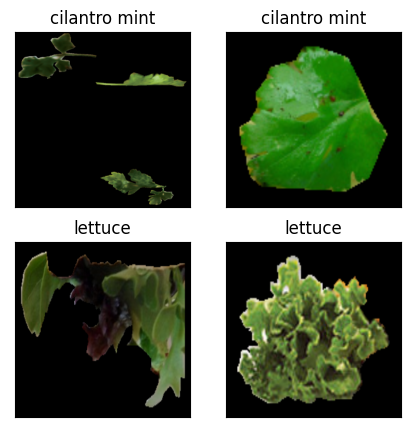

In [39]:
# ciliantro mint images
cilantro_mint_images = [img for img, label in dataset if label == classes_code["cilantro_mint"]]
# lettuce images
lettuce_images = [img for img, label in dataset if label == classes_code["lettuce"]]

# shuffle the images
np.random.shuffle(cilantro_mint_images)
np.random.shuffle(lettuce_images)

# plot 4 images from each class horizontally
fig, axes = plt.subplots(2, 2, figsize=(5, 5))

for i in range(2):
    axes[0, i].imshow(cilantro_mint_images[i])
    axes[0, i].set_title("cilantro mint")
    axes[0, i].set_xticks([])
    axes[0, i].set_yticks([])

    axes[1, i].imshow(lettuce_images[i])
    axes[1, i].set_title("lettuce")
    axes[1, i].set_xticks([])
    axes[1, i].set_yticks([])



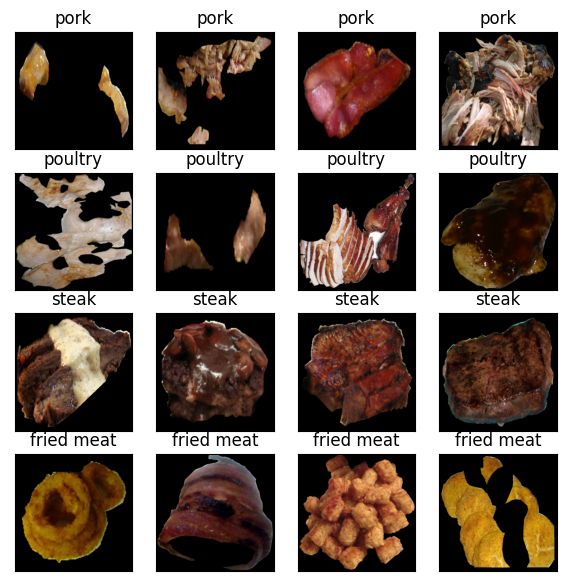

In [43]:
# pork images
pork_images = [img for img, label in dataset if label == classes_code["pork"]]
# poultry images
poultry_images = [img for img, label in dataset if label == classes_code["poultry"]]
# steak images
steak_images = [img for img, label in dataset if label == classes_code["steak"]]
# fried meat images
fried_meat_images = [img for img, label in dataset if label == classes_code["fried_meat"]]

# shuffle the images
np.random.shuffle(pork_images)
np.random.shuffle(poultry_images)
np.random.shuffle(steak_images)
np.random.shuffle(fried_meat_images)

# plot 4 images from each class horizontally
fig, axes = plt.subplots(4, 4, figsize=(7, 7))

for i in range(4):
    axes[0, i].imshow(pork_images[i])
    axes[0, i].set_title("pork")
    axes[0, i].set_xticks([])
    axes[0, i].set_yticks([])

    axes[1, i].imshow(poultry_images[i])
    axes[1, i].set_title("poultry")
    axes[1, i].set_xticks([])
    axes[1, i].set_yticks([])

    axes[2, i].imshow(steak_images[i])
    axes[2, i].set_title("steak")
    axes[2, i].set_xticks([])
    axes[2, i].set_yticks([])

    axes[3, i].imshow(fried_meat_images[i])
    axes[3, i].set_title("fried meat")
    axes[3, i].set_xticks([])
    axes[3, i].set_yticks([])

In [9]:
# run model on dataset and plot a confusion matrix
y_pred = []
y_true = []

unniqur_labels = np.unique(dataset.labels)

lbl = set()
with torch.no_grad():
    model.eval()
    for i in range(len(test_set)):
        img, label = test_set[i]
        lbl.add(label)

        # show image
        # plt.imshow(img)
        # plt.show()
        # print("True label: ", dataset.classes[label])
        # print("Predicted label: ", dataset.classes[torch.argmax(model(tf(img).unsqueeze(0)))])
        out = model(tf(img).unsqueeze(0))
        y_pred.append(torch.argmax(out))
        y_true.append(label)
    model.train()

import pickle
# save y_pred and y_true to file
with open("y_pred.pkl", "wb") as f:
    pickle.dump(y_pred, f)

with open("y_true.pkl", "wb") as f:
    pickle.dump(y_true, f)





In [ ]:
# load y_pred and y_true from file
with open("y_pred.pkl", "rb") as f:
    y_pred = pickle.load(f)

with open("y_true.pkl", "rb") as f:
    y_true = pickle.load(f)

In [ ]:
# accuracy per class
from sklearn.metrics import accuracy_score

for i in range(len(unniqur_labels)):
    # get indices of class i
    indices = [j for j, x in enumerate(y_true) if x == i]
    # get true labels
    y_true_i = [y_true[j] for j in indices]
    # get predicted labels
    y_pred_i = [y_pred[j] for j in indices]
    # compute accuracy
    acc = accuracy_score(y_true_i, y_pred_i)
    print("Accuracy for class ", dataset.classes[i], ": ", acc)
    # print number of samples
    print("Number of samples: ", len(y_true_i))


Accuracy for class  cauliflower :  0.3333333333333333
Number of samples:  66
Accuracy for class  lemon :  0.6374269005847953
Number of samples:  171
Accuracy for class  biscuit :  0.5915492957746479
Number of samples:  71
Accuracy for class  french_fries :  0.21875
Number of samples:  64
Accuracy for class  lettuce :  0.676829268292683
Number of samples:  164
Accuracy for class  bread :  0.21483375959079284
Number of samples:  391
Accuracy for class  cheese :  0.27522935779816515
Number of samples:  109
Accuracy for class  rice :  0.46568627450980393
Number of samples:  204
Accuracy for class  potato :  0.66
Number of samples:  300
Accuracy for class  celery_stick :  0.8095238095238095
Number of samples:  63
Accuracy for class  green_beans :  0.4918032786885246
Number of samples:  61
Accuracy for class  blueberry :  0.2857142857142857
Number of samples:  56
Accuracy for class  spring_onion :  0.46153846153846156
Number of samples:  52
Accuracy for class  carrot :  0.5948051948051948
Nu

In [10]:
num_correct = sum([1 if y_pred[i] == y_true[i] else 0 for i in range(len(y_pred))])
num_correct / len(y_pred) * 100 , 1/43*100

(33.57224303632513, 2.3255813953488373)

0.32338669108082796


<Figure size 60000x60000 with 0 Axes>

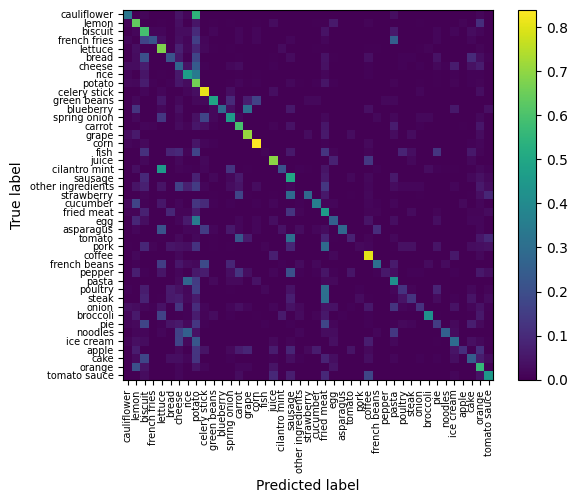

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd

cm = confusion_matrix(y_true, y_pred)
# normalize confusion matrix
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(600, 600))

# replace "_" with " " in class names
classes = [c.replace("_", " ") for c in dataset.classes]

ConfusionMatrixDisplay(cm, display_labels=classes).plot(xticks_rotation=90, values_format='d', include_values=False)
# normalize counts to show percentage
plt.tick_params(axis='both', which='major', labelsize=7)
# get f1 score
from sklearn.metrics import f1_score
f1 = f1_score(y_true, y_pred, average='macro')
print(f1)
# save figure
plt.savefig("confusion_matrix.png", dpi=300)
